<img style="float: right;" src="shadow.png"/>

# SHADOW Framework

### *Scheduling algorithms for DAG Workflows*

SHADOW is a library for the use and testing of DAG-based workflow
scheduling algorithms. SHADOW provides implementations of various heuristic and metaheuristic algorithms to address single-and multi-objective scheduling problems; these algorithms are accessed using a workflow-oriented class system built into the library.

## About this 'Poster'

### Table of Contents

[Widget setup](#Widget-setup)

[Models and your first `workflow`](#Models-in-Shadow)

[Running algorithms and visualisations](#Algorithms-and-Visualisation)

[SHADOWGen and transating graphs](shadowgen.ipynb)

[Metrics and analysis]()

## Models in Shadow 

[Back to top](#Table-of-Contents)

The `models` component of SHADOW provides the data structures and environments from which you can build an algorithm and visualise results. 

In [45]:
from shadow.models.workflow import Workflow, Task
from shadow.models.environment import Environment, Machine

The standard approach to setting up the workflow is to import from a JSON file:

In [36]:
workflow = Workflow('examples/dag.json')

There are options to extend the Task as well, in the even that an algorithm is built with additional objectives in mind (which is likely in Cloud scheduling etc.). 


In [ ]:
class CloudTask(Task):
   
    def __init__(self):
        super.__init__()
        self.cost = None
        
    def calculate_cost_on_machine(self,machine):
        return self.calc_runtime(machine=machine)*machine.cost

 <a id='#section2'></a>

## Algorithms and Visualisation
 [Back to top](#Table-of-Contents)

In [37]:
widget,algorithm_choice,file_choice,sys_choice=ipywidget_algorithm_setup()
display(widget)

TwoByTwoLayout(children=(Dropdown(description='Heuristic selection:', layout=Layout(grid_area='top-left'), opt…

In [38]:
# Get selection
algorithm = algorithm_choice.value
workflow_file = file_choice.value
sys = sys_choice.value
# Standard algorithm imports
from shadow.algorithms.heuristic import heft, pheft, fcfs
from shadow.models.workflow import Workflow
from shadow.models.environment import Environment


workflow = Workflow(workflow_file)
env = Environment(sys)
workflow.add_environment(env)
solution = algorithm(workflow)
print("Makespan is: ", solution.makespan)

Makespan is:  98


### Visualising the results

If we use the above results, we can do some different visualisations:

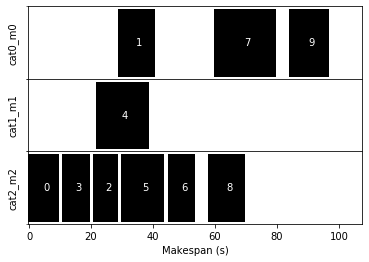

In [40]:
import shadow.visualiser.plot as splot
import matplotlib.pyplot as plt


heft_plot = splot.AllocationPlot(solution)
heft_fig, heft_ax = heft_plot.plot()

## SHADOWGen

SHADOWGen collates a number of tools that are used in both the task-scheduling community, and the workflow scheduling community. 



### DAX Translator

DAX graphs are formatted using XML generated by the Pegasus project and [Workflow Generator](https://github.com/pegasus-isi/WorkflowGenerator). Running the cell below demonstrates the typical structure of a DAX file. 

In [41]:
file_choice = ipywidget_shadowgen_setup()
display(file_choice)

Dropdown(description='Heuristic selection:', options=(('HEFT Paper DAG', 'examples/HEFT_paper.xml'), ('Cybersh…

In [42]:
!cat $file_choice.value

<?xml version="1.0" encoding="UTF-8"?>
<!-- generated: 2008-09-24T14:28:09-07:00 -->
<!-- generated by: shishir [??] -->
<adag xmlns="http://pegasus.isi.edu/schema/DAX" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://pegasus.isi.edu/schema/DAX http://pegasus.isi.edu/schema/dax-2.1.xsd" version="2.1" count="1" index="0" name="test" jobCount="25" fileCount="0" childCount="20">
<!-- part 1: list of all referenced files (may be empty) -->
<!-- part 2: definition of all jobs (at least one) -->
  <job id="ID00000" namespace="Montage" name="mProjectPP" version="1.0" runtime="13.39">
    <uses file="region.hdr" link="input" register="true" transfer="true" optional="false" type="data" size="304"/>
    <uses file="2mass-atlas-ID00000s-jID00000.fits" link="input" register="true" transfer="true" optional="false" type="data" size="4222080"/>
    <uses file="p2mass-atlas-ID00000s-jID00000.fits" link="output" register="true" transfer="true" optional="false" type="data

DAX files contain a lot of metadata information that is not necessary for running benchmarking and testing the algorithms, and the structure is slightly different to that of other graph formats. This is why we have chosen to implement our own format that models a dictionary, which is more Pythonic as well as being easier to extend with the NetworkX integration. 

In [47]:
from utils.shadowgen import dax
import networkx as nx
import pydot
import graphviz
import sys
import os 
from IPython.display import Image, display

# print(sys.path[0])
# sys.path.append('/experiments/dax_files/')

# print(os.chdir('../experiments/dax_files/'))


In [48]:
dax.clean_xml(file_choice.value, 'output/edit_dax.xml', 'xmlns',
    '<adag version="2.1" count="1" index="0" name="test" jobCount="25" fileCount="0" childCount="20">\n')
# moves edited xml to the nx DiGraph object
finished_dag = dax.build_dag('output/edit_dax.xml')
dax.generate_shadow_json(finished_dag, 'output/dax.json')

In [49]:
# Verify output is correct JSON
print(finished_dag)
!cat 'output/dax.json'


{
  "header": {
    "time": false
  },
  "graph": {
    "directed": true,
    "multigraph": false,
    "graph": {},
    "nodes": [
      {
        "comp": 800.0,
        "id": "ID00006"
      },
      {
        "comp": 70.0,
        "id": "ID00000"
      },
      {
        "comp": 630.0,
        "id": "ID00004"
      },
      {
        "comp": 730.0,
        "id": "ID00008"
      },
      {
        "comp": 1420.0,
        "id": "ID00012"
      },
      {
        "comp": 1360.0,
        "id": "ID00021"
      },
      {
        "comp": 740.0,
        "id": "ID00010"
      },
      {
        "comp": 1430.0,
        "id": "ID00023"
      },
      {
        "comp": 780.0,
        "id": "ID00025"
      },
      {
        "comp": 1530.0,
        "id": "ID00017"
      },
      {
        "comp": 1100.0,
        "id": "ID00027"
      },
      {
        "comp": 1530.0,
        "id": "ID00015"
      },
      {
        "comp": 850.0,
        "id": "ID00029"
      },
      {
        "comp": 1360.0,

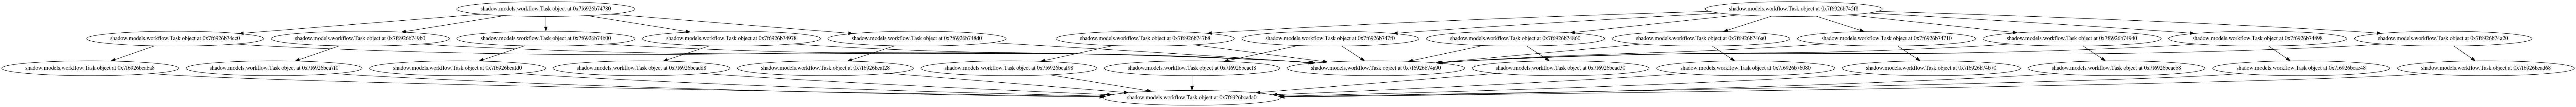

In [50]:
from shadow.models.workflow import Workflow
workflow = Workflow('output/dax.json')
dotgraph = nx.nx_pydot.to_pydot(workflow.graph)
dotgraph.write_png('output.png')
Image('output.png')


# Widget setup
 [Back to top](#Table-of-Contents)

To make things easier and more fun(!) to interact with, this poster has `ipywidget` functionality. However, it is a bit cumbersome to have both SHADOW code and widget code in the same document, so I've created some helper functions to reduce the code cells that are needed to display the widgets. Running the following code cells will ensure you can use dropdown menus and radio buttons to your hearts content! 

In [36]:
from shadow.algorithms.heuristic import heft, pheft, fcfs
from ipywidgets import interact, widgets, TwoByTwoLayout

def ipywidget_algorithm_setup():
    style = {'description_width': 'initial', 'width': 'auto'}

    algo = widgets.Dropdown(
        options=[('heft', heft), ('pheft', pheft), ('fcfs', fcfs)],
        # value='pineapple', # Defaults to 'pineapple'
        # layout={'width': 'max-content'}, # If the items' names are long
        description='Heuristic selection:',
        style=style,
        disabled=False
    )
    import os
    # os.chdir('../test/data/shadowgen/')
    file_list = [('Basic DAG', 'examples/dag.json'), ('Epigenomics Pipeline', 'examples/shadow_Epigenomics_24.json')]
    files = widgets.Dropdown(
        options=file_list,
    #    layout={'width': 'max-content'}, # If the items' names are long
        description='DAX Workflow File:',
        style=style,
        disabled=False
    )
    
    sys  = widgets.Dropdown(
        options=[('Basic system config', 'examples/sys.json')],
    #    layout={'width': 'max-content'}, # If the items' names are long
        description='DAX Workflow File:',
        style=style,
        disabled=False
    )
    
    
    return TwoByTwoLayout(top_left=algo,bottom_left=files, top_right=sys), algo, files, sys



def ipywidget_shadowgen_setup():
    style = {'description_width': 'initial', 'width': 'auto'}

    files = widgets.Dropdown(
        options=[
            ("HEFT Paper DAG","examples/HEFT_paper.xml"),
            ('Cybershake','examples/cybershake_30.xml'), 
            ('Epigenomics', 'examples/Epigenomics_24.xml'), 
            ('Montage', 'examples/Montage_25.xml')
        ],
        # value='pineapple', # Defaults to 'pineapple'
        # layout={'width': 'max-content'}, # If the items' names are long
        description='Heuristic selection:',
        style=style,
        disabled=False
    )


    return files

 [Back to top](#Table-of-Contents)
